In [1]:
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train = "./train/"
validation = "./validation/"

In [7]:
print("Details of Train Data : ")
for i in os.listdir(train):
    print("Total img in %s dir is : %d"%(i,len(os.listdir(train+i+"/"))))

Details of Train Data : 
Total img in Angry dir is : 3995
Total img in Disgust dir is : 436
Total img in Fear dir is : 4097
Total img in Happy dir is : 7215
Total img in Neutral dir is : 4965
Total img in Sad dir is : 4830
Total img in Surprise dir is : 3171


In [8]:
print("Details of Validation Data : ")
for i in os.listdir(validation):
    print("Total img in %s dir is : %d"%(i,len(os.listdir(validation+i+"/"))))

Details of Validation Data : 
Total img in Angry dir is : 491
Total img in Disgust dir is : 55
Total img in Fear dir is : 528
Total img in Happy dir is : 879
Total img in Neutral dir is : 626
Total img in Sad dir is : 594
Total img in Surprise dir is : 416


In [9]:
train_dir = {}
for i in os.listdir(train):
    train_dir[i] = train + i + "/"

(48, 48, 3)


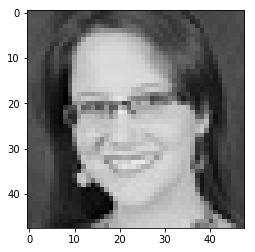

(48, 48, 3)


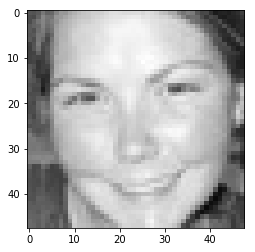

(48, 48, 3)


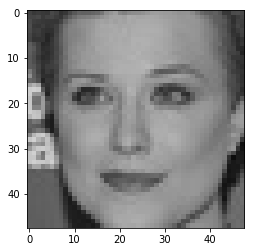

In [16]:
for i in os.listdir(train_dir['Happy'])[:3]:
    img = cv2.imread(train_dir['Happy']+i)
    print(img.shape)
    plt.imshow(img)
    plt.show()

In [90]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0 ,
                                   rotation_range=10,
                                   zoom_range=0.3,
                                   shear_range=0.3,
                                   horizontal_flip=True,
                                   width_shift_range=0.4,
                                   height_shift_range=0.4,fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [91]:
train_data = train_datagen.flow_from_directory(train,target_size=(50,50),class_mode='categorical',batch_size=32,color_mode='grayscale')
validation_data = validation_datagen.flow_from_directory(validation,target_size=(50,50),class_mode='categorical',batch_size=32,color_mode='grayscale')

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [92]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='elu',padding="same",kernel_initializer='he_normal',input_shape=(48,48,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32,(3,3),activation='elu',padding="same",kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='elu',padding="same",kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64,(3,3),activation='elu',padding="same",kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='elu',padding="same",kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128,(3,3),activation='elu',padding="same",kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(256,(3,3),activation='elu',padding="same",kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256,(3,3),activation='elu',padding="same",kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='elu',kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(64,activation='elu',kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(7,activation='softmax',kernel_initializer='he_normal')
])

In [93]:
#model1.summary()

In [94]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [95]:
checkpoint = ModelCheckpoint("Emotion.h5",
                            monitor='val_loss',
                            mode='min',
                            save_best_only=True,
                            verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                         min_delta=0,
                         patience=9,
                         verbose=2,
                         restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                             factor=0.2,
                             patience=3,
                             verbose=1,
                             min_delta=0.0001)
callbacks = [earlystop,checkpoint,reduce_lr]

In [96]:
model1.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.categorical_crossentropy,metrics=['acc'])

In [97]:
history = model1.fit(train_data,
                    steps_per_epoch=train_data.n//train_data.batch_size,
                    epochs=25,
                    callbacks=callbacks,
                    validation_data=validation_data,
                    validation_steps=validation_data.n//validation_data.batch_size)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 897 steps, validate for 112 steps
Epoch 1/25
896/897 [============================>.] - ETA: 1s - loss: 2.1377 - acc: 0.1955
Epoch 00001: val_loss improved from inf to 1.80420, saving model to Emotion.h5
897/897 [==============================] - 1392s 2s/step - loss: 2.1373 - acc: 0.1954 - val_loss: 1.8042 - val_acc: 0.2500
Epoch 2/25
896/897 [============================>.] - ETA: 1s - loss: 1.8135 - acc: 0.2412
Epoch 00002: val_loss improved from 1.80420 to 1.76896, saving model to Emotion.h5
897/897 [==============================] - 1434s 2s/step - loss: 1.8136 - acc: 0.2412 - val_loss: 1.7690 - val_acc: 0.2586
Epoch 3/25
896/897 [============================>.] - ETA: 1s - loss: 1.7761 - acc: 0.2660
Epoch 00003: val_loss did not improve from 1.76896
897/897 [==============================] - 1522s 2s/step - loss: 1.7760 - acc: 0.2660 - val_loss: 1.9410 - val_acc: 0.2383
Epoch 4/25
896/897 [============================>.]